## Model training

# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import RandomizedSearchCV

import warnings

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### prepare x & y variable

In [4]:
x = df.drop(columns=['math score'],axis=1)

In [5]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

## Column Transformer

In [10]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)


In [11]:
x = preprocessor.fit_transform(x)

In [12]:
x.shape

(1000, 19)

## train & test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

## #01 Linear Regression 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [15]:
# Initialize model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(x_train, y_train)


LinearRegression()

### prediction

In [16]:
# Predictions
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)


### Training metrics

In [18]:
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("---Training Performance---")
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))


---Training Performance---
RMSE: 5.323050852720513
MAE: 4.266711846071957
R2 Score: 0.8743172040139593


### Testing metrics

In [20]:
print("---Testing Performance---")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))



---Testing Performance---
RMSE: 5.393993869732843
MAE: 4.214763142474852
R2 Score: 0.8804332983749564


Text(0.5, 1.0, 'Actual vs Predicted - Linear Regression')

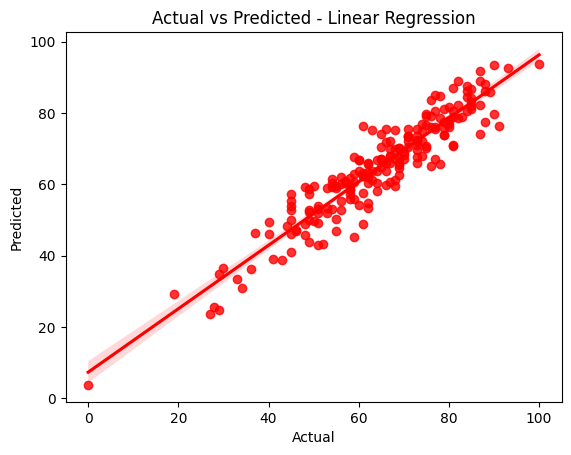

In [21]:
sns.regplot(x=y_test,y=y_test_pred,color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")

## Hyperparameter Tuning for Linear Regression
- Note: The classic LinearRegression in scikit-learn does not have many hyperparameters to tune (mainly fit_intercept and normalize, but normalize is deprecated).

- Instead, try regularized linear models:

- Ridge Regression (Ridge)

- Lasso Regression (Lasso)

- ElasticNet

These models penalize large coefficients and can help with overfitting and feature selection.

## 🔧 Model Evaluation Function

In [25]:
# Initialize empty list to store results
results = []

# Modified evaluate function to store metrics
def evaluate_and_store(model, X_train, y_train, X_test, y_test, model_name):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results.append({
        "Model": model_name,
        "Train RMSE": round(train_rmse, 2),
        "Test RMSE": round(test_rmse, 2),
        "Test MAE": round(test_mae, 2),
        "Test R2": round(test_r2, 4)
    })

    # Show plot
    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.grid(True)
    plt.show()


### Cross-validation Settings

In [26]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=3, shuffle=True, random_state=42)


###  Ridge Regression with Hyperparameter Tuning

Best Ridge Params: {'alpha': 1, 'fit_intercept': True}


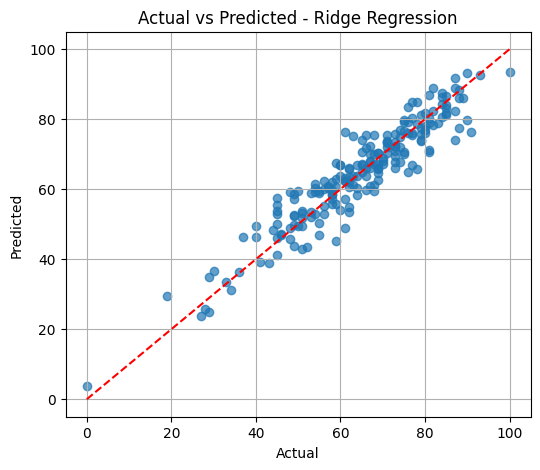

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}
ridge = GridSearchCV(Ridge(random_state=42), ridge_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
ridge.fit(x_train, y_train)

print("Best Ridge Params:", ridge.best_params_)
evaluate_and_store(ridge.best_estimator_, x_train, y_train, x_test, y_test, "Ridge Regression")



### Lasso Regression with Hyperparameter Tuning

Best Lasso Params: {'alpha': 0.01, 'fit_intercept': False}


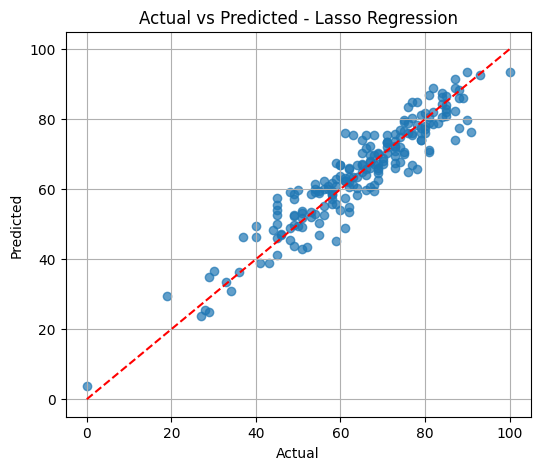

In [29]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}
lasso = GridSearchCV(Lasso(random_state=42,max_iter=10000), lasso_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lasso.fit(x_train, y_train)

print("Best Lasso Params:", lasso.best_params_)

evaluate_and_store(lasso.best_estimator_, x_train, y_train, x_test, y_test, "Lasso Regression")



### ElasticNet Regression with Hyperparameter Tuning
- Combines Lasso and Ridge regularization for better performance on correlated features

Best ElasticNet Params: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.8}


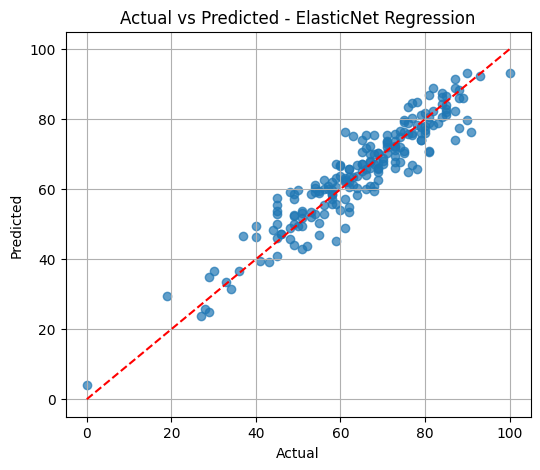

In [30]:
from sklearn.linear_model import ElasticNet


elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8],
    'fit_intercept': [True, False]
}
elastic = GridSearchCV(ElasticNet(random_state=42, max_iter=10000), elastic_params, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
elastic.fit(x_train, y_train)

print("Best ElasticNet Params:", elastic.best_params_)
evaluate_and_store(elastic.best_estimator_, x_train, y_train, x_test, y_test, "ElasticNet Regression")


In [31]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.sort_values(by="Test R2", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Train RMSE,Test RMSE,Test MAE,Test R2
0,Lasso Regression,5.32,5.38,4.21,0.8809
1,Lasso Regression,5.32,5.38,4.21,0.8809
2,ElasticNet Regression,5.33,5.38,4.20,0.8808
3,Ridge Regression,5.32,5.39,4.21,0.8806
